In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## 1. 调查取样
如果你要调查所在班级的同学的社交情况，并分析这个社交网络对学习或者找工作的影响。请问：

（1）你认为如何取样比较好，为什么？

（2）设计3-5个调查问卷访题。结合实际，解释设计的理念，并分析这几个访题分别可能会造成什么潜在的遗漏。

答：因为一个班人并不多，而且人都比较好找，所以比起要一步一步去问的滚雪球，直接发调查问卷给每个人，问他们跟谁关系比较好更方便。通常来说，我们可以在问卷中得到多个网络的信息，但重要的是问题需要比较具体，以确保回答者对于问题的理解是基本一致的。比如可以问：1）请列出你平时最经常一起讨论学习的五名同学，2）请列出你觉得在找工作的时候最可能会能帮上忙的五名同学，3）请列出你平时会与其分享个人生活的五名同学。人们讨论重要人生问题的时候，和讨论感情和八卦的时候，经常找的是不同的朋友，因此区分网络关系中承载的各种不同的信息和感情是设计调查问卷中很重要的一环。

## 2. 网络生成和度分布分析的相关概念
（1）Watts-Strogatz小世界网络、Erdos-Renyi网络、以及Barabási-Albert网络的生成函数。

In [2]:
#nx.random_graphs.watts_strogatz_graph(n,k,p)  
#nx.random_graphs.erdos_renyi_graph(n,p)
#nx.random_graphs.barabasi_albert_graph(n,m)

(2) 令$n=100, k=4, p=0.3$，生成一个Watts-Strogatz网络。阅读networkx中相关的文档，解释其中参数 $n, k, p$ 的含义，并汇报这个网络的邻边数量。

* n: 网络节点总数
* k: 把节点排成一个环形，每个节点与k个最近邻居相连
* p: 对每个邻边，有p的概率改变其所连接的节点
* 因为是无向图，邻边数量为$n \times k /2=200$

In [3]:
WS = nx.random_graphs.watts_strogatz_graph(n=100,k=4,p=0.3)
nx.info(WS)

'Graph with 100 nodes and 200 edges'

（3）根据Erdos-Renyi函数在networkx中的定义，解释其中参数 $p$ 的含义。计算：如果我们希望生成一个 $n=100$ 的Erdos-Renyi网络，令其邻边数量的期望值为 $E_{WS}$，那么 $p$ 应被设定成什么值？重复1000次生成 $n=100$ 的Erdos-Renyi网络并计算邻边数量，验证这个结论。

* p: 在所有的节点中任取两点，它们有p的概率能组成邻边。这意味着任何两点间的邻边，其生成的概率都是独立的。
* 通过Erdos-Renyi网络的生成机制我们知道，对于无向图来说，$E_{WS}=|V|(|V|-1)\times p/2 $, 即$p=
\frac{2E_{WS}}{|V|(|V|-1)}$. 
* 比如我们希望$E_{WS}=200$，那么$p=(2\times 200)/(100\times 99)=4/99$

In [4]:
k = []
for i in range(1000):
    ER = nx.random_graphs.erdos_renyi_graph(100, 4/99)
    k.append(len(ER.edges()))
np.array(k).mean() ## 很接近期望值200了

200.012

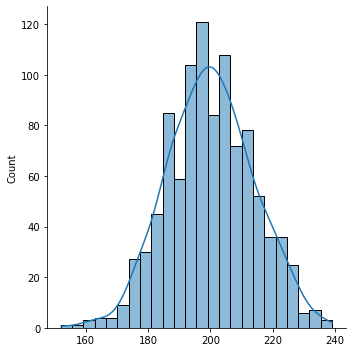

In [5]:
import seaborn as sns #作图用
sns.displot(k, kde=True)
plt.show()

（4）给定一个 $n=100, m=2$ 的Barabási-Albert网络，不通过编程的方式，根据其函数定义直接计算出这个网络的邻边数量（提示：这个数量应该是定值）。生成这个网络，验证结论。
* Barabási-Albert网络的生成机制以一个初始的，邻边数为0的网络. 对每个新加的节点，算法将其与网络中既存的$m$个节点相连，连接概率与既存节点的邻边数成正比。因为这样的生成机制，邻边高的点会有更高的概率与新节点相连。故而会形成“富者越富”的马太效应。
* 以一个邻边数为0，节点数为m的网络开始，每次添加一个点就为其连接 $m$ 条边，重复 $n-m$ 次，直到得到 $n$ 的节点的网络图。故而邻边有 $(n-m)\times m = (100-2)\times 2=196$ 条。

In [6]:
BA = nx.random_graphs.barabasi_albert_graph(n=100,m=2)
nx.info(BA)

'Graph with 100 nodes and 196 edges'

（5）分别用Shell和Spring Layout画出上述三个网络进行比较，你有什么发现？解释这些发现。
提示：因为节点ID都是0-99，我们可以尝试先固定点的位置，再绘制不同网络图的边进行比较。

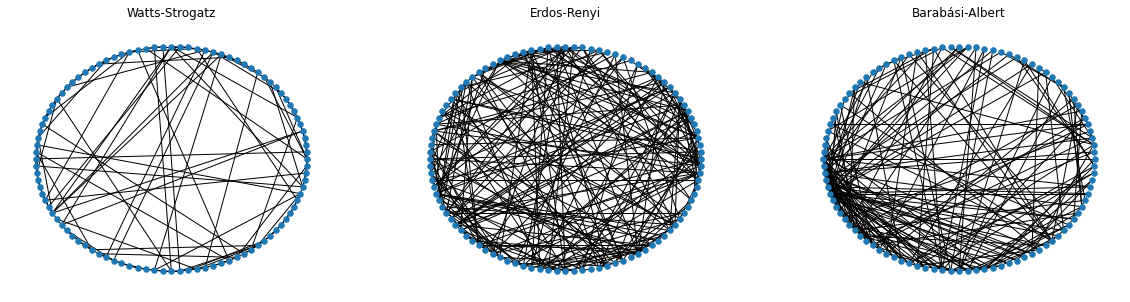

In [7]:
# Shell
fig, axs = plt.subplots(1,3, figsize=(20,5))
pos = nx.shell_layout(BA)
nx.draw(WS, pos, with_labels=False,node_size = 30, ax=axs[0])
nx.draw(ER, pos, with_labels=False,node_size = 30, ax=axs[1])
nx.draw(BA, pos, with_labels=False,node_size = 30, ax=axs[2])
axs[0].set_title('Watts-Strogatz')
axs[1].set_title('Erdos-Renyi')
axs[2].set_title('Barabási-Albert')
plt.show()

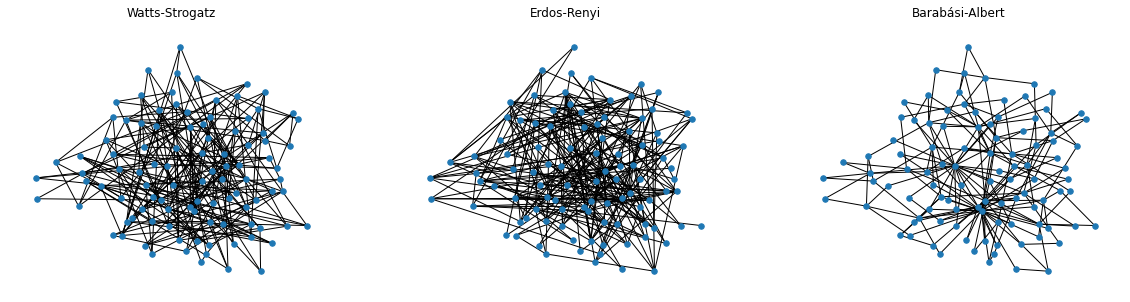

In [8]:
# Spring Layout
fig, axs = plt.subplots(1,3, figsize=(20,5))
pos = nx.spring_layout(BA, seed=100)
nx.draw(WS, pos, with_labels=False, node_size = 30, ax=axs[0])
nx.draw(ER, pos, with_labels=False, node_size = 30, ax=axs[1])
nx.draw(BA, pos, with_labels=False, node_size = 30, ax=axs[2])
axs[0].set_title('Watts-Strogatz')
axs[1].set_title('Erdos-Renyi')
axs[2].set_title('Barabási-Albert')
plt.show()

In [9]:
nx.info(WS), nx.info(ER), nx.info(BA)

('Graph with 100 nodes and 200 edges',
 'Graph with 100 nodes and 227 edges',
 'Graph with 100 nodes and 196 edges')

（6）创建一个 $n=3000, k=4, p=0.3$ 的Watts-Strogatz网络 $WS_{1000}$。根据（3）中我们发现的 $p$ 和 $E_{WS}$ 的关系，以及（4）中我们发现的，Barabási-Albert网络中 $m$ 和邻边数量的关系，计算所需的 $p$ 和 $m$ 值，以得到邻边数量与 $WS_{1000}$ 接近的Erdos-Renyi网络和Barabási-Albert网络。

In [10]:
WS_new = nx.random_graphs.watts_strogatz_graph(n=3000,k=4,p=0.3)  
nx.info(WS_new)

'Graph with 3000 nodes and 6000 edges'

In [11]:
ER_new = nx.random_graphs.erdos_renyi_graph(n=3000,p=(2*6000)/(3000*2999))
nx.info(ER_new) #边数有随机性

'Graph with 3000 nodes and 5975 edges'

In [12]:
import math #需要解个方程 m^2-3000*m+6000=0
root = math.sqrt(1500**2-6000)
BA_new = nx.random_graphs.barabasi_albert_graph(n=3000,m=round(root+1500))
nx.info(BA_new)

'Graph with 3000 nodes and 5996 edges'

In [13]:
BA_new = nx.random_graphs.barabasi_albert_graph(n=3000,m=round(-root+1500))
nx.info(BA_new)

'Graph with 3000 nodes and 5996 edges'

（7）用散点图画出三个网络图对应的点度分布图，其中X轴为点度，Y轴为频率。提示：可以对X轴Y轴分别取log再作图。对比三张图，描述和解释它们之间的区别和联系。
* 答案重点在于Barabási-Albert图的马太效应：有极少的一些节点，其点度中心度极大

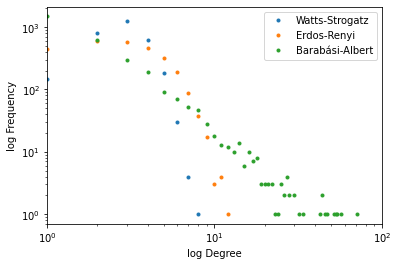

In [14]:
counts = Counter(d for n, d in np.array(nx.degree(WS_new)))
b = [counts.get(i, 0) for i in range(1,max(counts)+1)]
x = range(len(b)); y = [z for z in b]
plt.xlabel("log Degree"); plt.ylabel("log Frequency")
plt.loglog(x, y, '.', label='Watts-Strogatz')

counts = Counter(d for n, d in np.array(nx.degree(ER_new)))
b = [counts.get(i, 0) for i in range(1,max(counts)+1)]
x = range(len(b)); y = [z for z in b]
plt.xlabel("log Degree"); plt.ylabel("log Frequency")
plt.loglog(x, y, '.', label='Erdos-Renyi')

counts = Counter(d for n, d in np.array(nx.degree(BA_new)))
b = [counts.get(i, 0) for i in range(1,max(counts)+1)]
x = range(len(b)); y = [z for z in b]
plt.xlabel("log Degree"); plt.ylabel("log Frequency")
plt.loglog(x, y, '.', label='Barabási-Albert')

plt.xlim(1, 100);
plt.legend();plt.show()

## 3. SNAP
(1) 从SNAP-DBLP (https://snap.stanford.edu/data/com-DBLP.html) 下载“com-dblp.ungraph.txt.gz”和“com-dblp.top5000.cmty.txt.gz”两个数据包。DBLP是一个关于计算机领域论文的大型数据库，我们所下载的这个网络则是基于DBLP所建立的一个关于作者的合著（co-authorship）网络。

(2) 解码两个数据包，用“com-dblp.ungraph.txt”生成网络，这个网络G应该包含317, 080个节点和1, 049, 866个邻边。计算G的平均集聚系数、闭合三元组（triangles数量），以及闭合三元组的比例（Fraction of Closed Triangles），并与上述网站进行核对。


In [15]:
f = open('/Users/bjcliang/Downloads/com-dblp.ungraph.txt')
[(next(f)) for i in range(4)]
edgelist = [tuple(map(int, sent.split())) for sent in f]

In [16]:
G_nx = nx.Graph()
G_nx.add_edges_from(edgelist)
nx.info(G_nx)

'Graph with 317080 nodes and 1049866 edges'

In [17]:
import time
time0=time.time()
print("平均集聚系数:", round(nx.average_clustering(G_nx)), 4)
print("用时", round(time.time()-time0, 4), "秒")
print()
time0=time.time()
triangles = nx.triangles(G_nx)
print("闭合三元组:", sum(triangles.values())/3)
print("用时", round(time.time()-time0, 4), "秒")

平均集聚系数: 1 4
用时 6.5468 秒

闭合三元组: 2224385.0
用时 6.3058 秒


In [18]:
#!pip install snap-stanford
import snap
G_snap = snap.TUNGraph.New()
for v in G_nx.nodes(): G_snap.AddNode(v)
for v1,v2 in G_nx.edges(): G_snap.AddEdge(v1,v2)

In [19]:
time0=time.time()
print("平均集聚系数:", round(G_snap.GetClustCf()), 4)
print("用时", round(time.time()-time0, 4), "秒")
print()
time0=time.time()
result = G_snap.GetTriadsAll()
print("闭合三元组:", result[0])
print("闭合三元组的比例:", round(result[0]/(result[0]+result[2])), 4)
print("用时", round(time.time()-time0, 4), "秒")

平均集聚系数: 1 4
用时 0.9162 秒

闭合三元组: 2224385
闭合三元组的比例: 0 4
用时 0.8787 秒


（3）读入“com-dblp.top5000.cmty.txt”文件，这个文件包含了整个网络中最大的5000个社区，我们从中得到最大的社区，并用subgraph函数从G中提取对应的子图，命名为sub_G (n=7556)。然后，我们用networkx包中的greedy modularity函数挖掘sub_G中的社区，并再次提取其中最大的社区，称为sub2G。提示：因为greedy modularity函数假设要图中节点ID为 0-N，而我们的子图中节点ID并不是连续的，所以我们需要先用nx.relabel.convert_node_labels_to_integers函数重命名sub_G中的节点，才能进行社区挖掘。

In [20]:
f = open('/Users/bjcliang/Downloads/com-dblp.top5000.cmty.txt')
communities = [tuple(map(int, sent.split())) for sent in f]
sorted_communities = sorted(communities, key = lambda x: -len(x))
sub_G = G_nx.subgraph(sorted_communities[0])
nx.info(sub_G)

'Graph with 7556 nodes and 18123 edges'

In [21]:
sub_G_renamed = nx.relabel.convert_node_labels_to_integers(sub_G)
community = nx.algorithms.community.greedy_modularity_communities(sub_G_renamed)
largest_community = sorted(community, key = lambda x: len(x))[-1]
sub2G = sub_G_renamed.subgraph(largest_community)
nx.info(sub2G)

'Graph with 1164 nodes and 3241 edges'

In [22]:
sub2G_renamed = nx.relabel.convert_node_labels_to_integers(sub2G)
community = nx.algorithms.community.greedy_modularity_communities(sub2G_renamed)

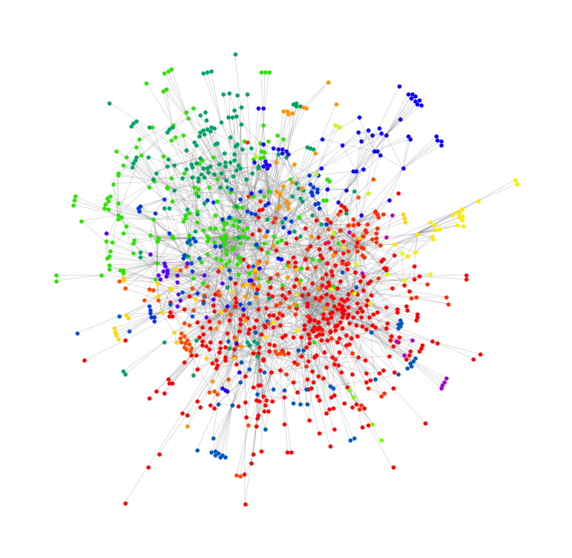

In [23]:
import matplotlib.cm as cm #用来获得色卡
plt.figure(figsize=(10, 10)) # 控制图片的大小
pos = nx.spring_layout(sub2G_renamed,iterations=300, seed=100)
cmap = cm.get_cmap('prism')
for i, group in enumerate(community):
    color = np.array([cmap(i/len(community))])
    nx.draw_networkx_nodes(sub2G_renamed, pos, 
                           group, node_size=10, 
                           node_color=color)
nx.draw_networkx_edges(sub2G_renamed, pos, alpha=0.2, edge_color = 'grey')
plt.axis('off'); plt.show()